In [1]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt

import pywt
import wfdb

import util_func

In [2]:
curr_dir = os.getcwd()
data_dir = os.path.join(curr_dir, 'data/ludb')

hea_paths = glob.glob(os.path.join(data_dir, '*hea'))

In [3]:
all_signal = []

for path in hea_paths:
    record_path = os.path.splitext(path)[0]
    record = wfdb.rdrecord(record_path)
    all_signal.append(record.p_signal[:, 1])

In [4]:
all_signal

[array([ 24.99079868,  97.00036805, 194.99447921, ..., -41.99484726,
         -6.99300699, -21.99116673]),
 array([ -71.99666428, -152.00370722, -180.00133506, ...,  -30.00022251,
         -57.00139021,  -10.00329896]),
 array([-260.00678426, -259.00799035, -259.00799035, ...,   -3.99517564,
          -0.99879391,    0.        ]),
 array([ 340.00274267,  340.00274267,  340.00274267, ..., -115.01523952,
           4.99873926,   44.9886533 ]),
 array([-100.        ,  -88.99341486,  -78.99027908, ...,  -25.99560991,
          -7.99623706,   -2.00689871]),
 array([-40.00641145, -24.00384687,  -9.00470043, ..., -85.99423751,
        -58.0027809 , -28.99487475]),
 array([-19.9971775 , -19.01196369, -19.01196369, ...,  14.00601247,
          5.00595122,   1.99705501]),
 array([ 39.99044513,  45.01499127,  49.99835261, ..., -78.99245494,
        -25.98761161,  -7.98985206]),
 array([119.99080985, 119.99080985, 119.99080985, ..., -25.98936215,
          0.98818867,  10.00541033]),
 array([-60.0

In [5]:
len(all_signal[0])

5000

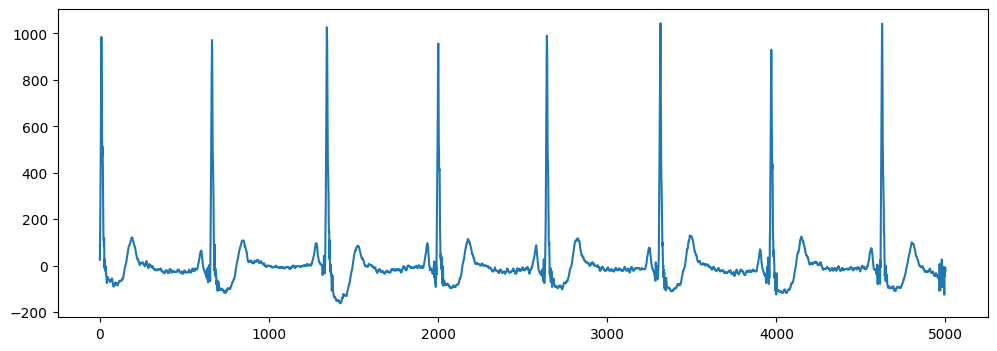

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(all_signal[0])

In [7]:
wavelets = ['db2', 'db4', 'db6', 'db8', 'sym4', 'sym5', 'sym6', 'sym7', 'haar', 'coif2', 'coif3', 'coif4', 'coif5', 'bior3.3', 'bior6.8']

In [8]:
average_snr = dict()
DECOMPOSE_LEVEL = 7

for wavelet in wavelets:
    all_snr = []
    for original_signal in all_signal:
        denoised_signal = util_func.denoise_dwt(original_signal, wavelet, DECOMPOSE_LEVEL)
        all_snr.append(np.nan_to_num(util_func.calculate_snr(original_signal, denoised_signal), nan=0))
    
    average_snr[wavelet] = np.mean(all_snr)

In [9]:
average_snr

{'db2': 22.20189994444387,
 'db4': 20.381903811301363,
 'db6': 19.197394161693037,
 'db8': 18.94367531068568,
 'sym4': 23.00348151539448,
 'sym5': 22.21248537017008,
 'sym6': 22.919023731114347,
 'sym7': 22.537265283108077,
 'haar': 22.95921166923748,
 'coif2': 23.13335328573261,
 'coif3': 23.667170373966847,
 'coif4': 24.58317240507401,
 'coif5': 25.08177837564126,
 'bior3.3': 17.930546996052716,
 'bior6.8': 24.607459426900697}

In [10]:
dict(sorted(average_snr.items(), key=lambda item: item[1]))

{'bior3.3': 17.930546996052716,
 'db8': 18.94367531068568,
 'db6': 19.197394161693037,
 'db4': 20.381903811301363,
 'db2': 22.20189994444387,
 'sym5': 22.21248537017008,
 'sym7': 22.537265283108077,
 'sym6': 22.919023731114347,
 'haar': 22.95921166923748,
 'sym4': 23.00348151539448,
 'coif2': 23.13335328573261,
 'coif3': 23.667170373966847,
 'coif4': 24.58317240507401,
 'bior6.8': 24.607459426900697,
 'coif5': 25.08177837564126}